# [PTT 美食板](https://www.ptt.cc/bbs/Food/index.html)

### 導入套件

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Gen Jyuu Gothic P'] # 中文輸出(源柔黑體)
import sqlite3
import requests # 讀取網頁資料
import bs4

In [2]:
headers = {'user-agent':'Mozilla/5.0 (X11; Linux x86_64)'}
def get_soup(url, headers=headers):
    r = requests.get(url, headers=headers)
    rt = r.text
    soup = bs4.BeautifulSoup(rt, "html.parser")
    
    return soup

In [3]:
url = 'https://www.ptt.cc/bbs/Food/index.html'

soup = get_soup(url)
print(soup.prettify()) # 美食板主頁原始碼

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   看板 Food 文章列表 - 批踢踢實業坊
  </title>
  <link href="//images.ptt.cc/bbs/v2.27/bbs-common.css" rel="stylesheet" type="text/css"/>
  <link href="//images.ptt.cc/bbs/v2.27/bbs-base.css" media="screen" rel="stylesheet" type="text/css"/>
  <link href="//images.ptt.cc/bbs/v2.27/bbs-custom.css" rel="stylesheet" type="text/css"/>
  <link href="//images.ptt.cc/bbs/v2.27/pushstream.css" media="screen" rel="stylesheet" type="text/css"/>
  <link href="//images.ptt.cc/bbs/v2.27/bbs-print.css" media="print" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <div id="topbar-container">
   <div class="bbs-content" id="topbar">
    <a href="/bbs/" id="logo">
     批踢踢實業坊
    </a>
    <span>
     ›
    </span>
    <a class="board" href="/bbs/Food/index.html">
     <span class="board-label">
      看板
     </span>
     Food
    </a>
    <a class="right small" href="/ab

### 從超連結中找出上頁的連結

In [4]:
def get_up_page(soup):
    for a in soup.find_all('a'):
        if '上頁' in a.get_text():
            up_page = 'https://www.ptt.cc' + a['href']
            break
            
    return up_page

In [5]:
new_url = get_up_page(soup)
new_url

'https://www.ptt.cc/bbs/Food/index7000.html'

In [6]:
soup = get_soup(url)
get_up_page(soup)

'https://www.ptt.cc/bbs/Food/index7000.html'

### 抓取頁面中的"食記"標題

In [7]:
def print_tag(soup, tag='[食記]'):
    for a in soup.find_all('a'):
        at = a.get_text()
        if tag in at and 'Re' not in at and 'Fw' not in at:
            print(at)

In [8]:
print_tag(soup)

[食記] 首爾moment coffee 弘大延南洞2號店 
[食記] 台北信義 松發肉骨茶-遠東信義A13
[食記] 高雄 跟著市長吃透透系列之賽門汕頭火鍋
[食記] 台北西門&北車早餐吃到飽-享樂文旅(開封)
[食記] 思鄉病 牛肉麵 遠百信義A13
[食記] 台北市文山區-永和豆漿大王(木新店)
[食記] 台北萬華 壽司王
[食記] 台北 忠孝SOGO 海記 醬油雞 雞肉軟嫩多汁
[食記] 福岡 太宰府 蘭館 焙煎珈琲 厚蛋燒三明治
[食記] 台北士林 CP值高美味日式料理-多摩食堂
[食記] 台北木柵 小廢墟咖啡Ruins Coffee Roasters
[食記] 台北 華泰王子飯店 九華樓
[食記] 陳Q古早味黑砂糖剉冰｜台北臨江通化夜市
[食記] 桃園中壢區。很牛炭燒牛排
[食記] 板橋江子翠。小喬新疆羊肉串~大盤雞好吃
[食記] 高雄 汕頭泉成沙茶火鍋總店 偏貴的古早味


### 主頁開始抓n頁所有"食記"

In [9]:
url = 'https://www.ptt.cc/bbs/Food/index.html'
n = 3

for i in range(n):
    soup = get_soup(url)
    print(url)
    print_tag(soup)
    url = get_up_page(soup)

https://www.ptt.cc/bbs/Food/index.html
[食記] 首爾moment coffee 弘大延南洞2號店 
[食記] 台北信義 松發肉骨茶-遠東信義A13
[食記] 高雄 跟著市長吃透透系列之賽門汕頭火鍋
[食記] 台北西門&北車早餐吃到飽-享樂文旅(開封)
[食記] 思鄉病 牛肉麵 遠百信義A13
[食記] 台北市文山區-永和豆漿大王(木新店)
[食記] 台北萬華 壽司王
[食記] 台北 忠孝SOGO 海記 醬油雞 雞肉軟嫩多汁
[食記] 福岡 太宰府 蘭館 焙煎珈琲 厚蛋燒三明治
[食記] 台北士林 CP值高美味日式料理-多摩食堂
[食記] 台北木柵 小廢墟咖啡Ruins Coffee Roasters
[食記] 台北 華泰王子飯店 九華樓
[食記] 陳Q古早味黑砂糖剉冰｜台北臨江通化夜市
[食記] 桃園中壢區。很牛炭燒牛排
[食記] 板橋江子翠。小喬新疆羊肉串~大盤雞好吃
[食記] 高雄 汕頭泉成沙茶火鍋總店 偏貴的古早味
https://www.ptt.cc/bbs/Food/index7000.html
[食記] 彰化 南園食堂 童趣偉士牌喵星人老屋
[食記] 台北 窩窩 wooo~老花窗裡的港式美味
[食記] 台北北投 蓬萊台菜餐廳
[食記] 高雄 Zakuzaku 棒棒泡芙 好吃的日式甜點
[食記] 桃園平鎮區。三禾手打麵
[食記] 台北 Truffles Aroma舒服氣息
[食記] 台北中山 祥雲龍吟 米其林二星 再訪 懷石創意料理
[食記][台北市] 佐藤咖哩 Sato Curry 和平店
[食記] 馬來西亞馬六甲Jonker 88 椰漿飯叻沙煎蕊
[食記] 高雄 好好吃肉韓式烤肉吃到飽 食肉怪必吃
[食記] 台南 邱家小卷米粉
[食記] 台北 coffet dpt：美式軟餅乾之王之特濃
[食記] 高雄 右昌肉圓
[食記] 宜蘭 泥鰍 在復古的美好年代裡品嘗咖哩飯
[食記] 新北板橋 金色三麥(板橋大遠百店)
[食記] 新北金山三倍大芋圓地瓜圓 金山芋圓王
[食記] 台中 空也素麵食 輕井澤蔬食鍋物改版 
[食記] 內湖食將王鐵板燒 平價鐵板燒餐廳
[食記] 首爾咖啡Fritz Coffee Company  
https://www.ptt.cc/bbs/Food/index6999.html
[食記] [台南]

In [10]:
def print_tag_lst(soup, lst, tag='[食記]'):
    for a in soup.find_all('a'):
        at = a.get_text()
        if tag in at and 'Re' not in at and 'Fw' not in at:
            lst.append(at)

### 爬蟲開始爬 先把資料存在lst

In [11]:
page = 3450
n = 2
lst = []

for i in range(n):
    url = 'https://www.ptt.cc/bbs/Food/index' + str(page) + '.html'
    soup = get_soup(url)
    print(url)
    print_tag_lst(soup, lst)
    page -= 1

https://www.ptt.cc/bbs/Food/index3450.html
https://www.ptt.cc/bbs/Food/index3449.html


### 寫入資料庫 food.db

### 讀出資料庫的資料 轉成pd.DataFramea

In [2]:
conn = sqlite3.connect('food.db')
c = conn.cursor()
df = pd.DataFrame(c.execute('SELECT * FROM pttfood'), columns=[row[0] for row in c.description])
conn.close()

df

,id,label
0,1,[食記] 沖繩｜恩納村｜夏威夷鬆餅屋 Paanilani
1,2,[食記] 日本正夯的生食吐司vs台中二家生食吐司
2,3,[食記] 台北大安區龍門國中附近-呂巷仔口麵食館
3,4,[食記] 台中 俺の食堂 板前燒肉一徹中午定食
4,5,[食記] 台中 KoDo和牛燒肉
...,...,...
111967,111968,[食記] 嘉義紅花鐵板燒
111968,111969,[食記] 中壢。福利川菜
111969,111970,[食記] 中推神牛炭火日式燒肉
111970,111971,[食記] 台大知多家


### 設定需要的小吃 寫入分類
* `pandas.Series.str.contains` 尋找字串是否存在

In [3]:
def create_city_count(rows, columns, num):
    city_count = pd.DataFrame(0, index=rows, columns=columns)
    for city in rows[:num]:
        for food in columns:
            city_count[food][city] = (df['label'].str.contains(city) & df['label'].str.contains(food)).sum()


    return city_count, columns

In [4]:
city_list = ['台北', '新北', '新竹', '台中', '台南', '高雄', '基隆', '桃園', '苗栗', '南投', '彰化', '雲林', '嘉義', 
             '屏東', '宜蘭', '花蓮', '台東', '澎湖', '金門', '連江']
food_list = ['飯', '麵', '雞', '鴨', '豬', '牛', '羊', '魚', '餃', '素', '肉', '湯', '羹', '粽', '鍋', '壽司',
             '便當', '咖啡', '茶', '酒', '冰']

In [5]:
city_count, columns = create_city_count(city_list, food_list, 6)
city_count.head(6)

,飯,麵,雞,鴨,豬,牛,羊,魚,餃,素,...,湯,羹,粽,鍋,壽司,便當,咖啡,茶,酒,冰
台北,1803,4441,1044,257,628,2137,144,729,375,203,...,874,94,22,2023,399,71,2531,1760,1626,632
新北,311,639,165,78,78,281,54,125,58,29,...,107,61,15,426,71,21,324,189,107,103
新竹,264,548,120,75,68,279,29,127,64,23,...,101,13,8,240,25,17,304,144,124,58
台中,456,1065,277,92,140,520,38,210,91,52,...,253,64,6,539,133,52,762,502,208,310
台南,463,834,288,124,163,624,101,466,68,41,...,473,93,52,468,100,16,435,475,178,419
高雄,474,879,252,151,114,451,65,207,127,65,...,203,46,30,469,185,28,496,538,227,247


### 資料正規化

In [6]:
arr = city_count.values[0:6] 
arr = arr / arr.sum(1)[:, np.newaxis] # (city.sum()) 全部比例縮放
arr = arr / arr.max(0) # (food.max()) 最大值縮放
arr = np.nan_to_num(arr) # 避免全0狀況

### 製圖

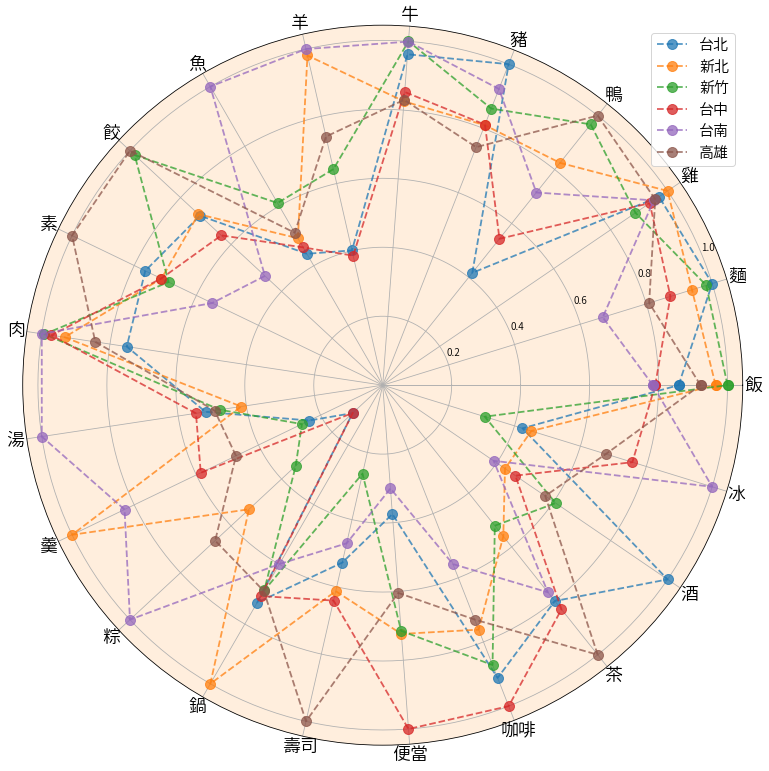

In [7]:
ar =  np.concatenate((arr, arr[:, 0:1]), axis=1)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0, 0, 1, 1], projection='polar', facecolor='#ffeedd')

angle = np.linspace(0, 2*np.pi, ar.shape[1])
for i in range(ar.shape[0]):
    ax.plot(angle, ar[i], 'o--', ms=10, lw=1.8, label=city_list[i], alpha=0.75)
for i in range(ar.shape[1]-1):
    ax.text(angle[i], 1.075, columns[i], fontsize=18, 
            horizontalalignment='center', verticalalignment='center')

# plt.ylim([0, 1.025])
plt.xticks(np.linspace(0, 2*np.pi, ar.shape[1]), [])
ax.grid(True)
plt.legend(loc=1, fontsize=15)

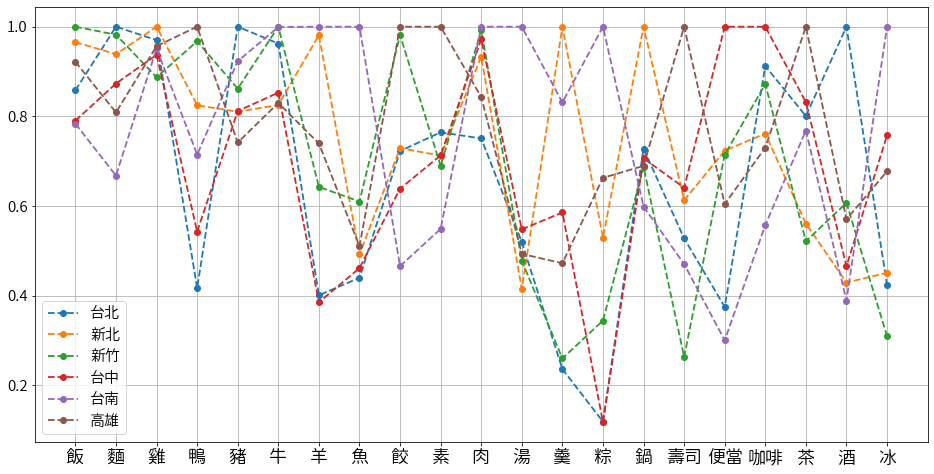

In [8]:
fig = plt.figure(figsize=(16, 8))
for i in range(arr.shape[0]):
    plt.plot(arr[i], 'o--', lw=1.8, label=city_list[i])
plt.xticks(np.arange(arr.shape[1]), columns, fontsize=18)
plt.yticks(fontsize=15)
plt.grid(True)
plt.legend(fontsize=15)

### 討論魚的細部分類

In [9]:
df[df.label.str.contains('魚')]

,id,label
21,22,[食記] 西門城中市場-很台南道味的虱目魚粥
26,27,[食記] 金澤 肉質細緻的喉黑魚飯三吃 のど黒めし本舗 いたる
41,42,[食記] 台南 咘。甜不辣 台北甜不辣、鮭魚炒飯
78,79,[食記]板橋 尋麻記~和想像中不同的水煮魚料理
127,128,[食記] 台北-- 用虹吸壺煮魚湯的綻1852牛排館
...,...,...
111782,111783,[食記] 台中人魚家
111785,111786,[食記] 屏東 東港黑鮪魚初體驗
111878,111879,[食記] 高雄 漢來 池畔餐廳 墨魚麵好好吃^@^
111882,111883,[食記] 草屯魷魚粳 肉圓 蚵仔嗲


In [10]:
fish_list = ['魚', '虱目魚', '鮭魚', '鮪魚', '鱸魚', '魷魚', '章魚', '鰻魚', '土魠魚', '鮑魚', '生魚片', '魚麵', 
             '魚頭', '魚皮', '魚肚', '魚湯', '魚丸']
city_count, columns = create_city_count(city_list, fish_list, 6)
city_count.head(6)

,魚,虱目魚,鮭魚,鮪魚,鱸魚,魷魚,章魚,鰻魚,土魠魚,鮑魚,生魚片,魚麵,魚頭,魚皮,魚肚,魚湯,魚丸
台北,729,27,43,17,3,47,15,67,8,15,118,12,4,0,15,13,18
新北,125,5,5,7,2,16,4,1,3,2,16,4,1,0,0,3,3
新竹,127,4,16,3,2,3,3,0,1,0,9,6,0,1,2,3,10
台中,210,6,7,1,2,11,9,18,0,4,31,2,1,0,3,4,5
台南,466,111,5,2,1,0,7,6,45,7,5,31,4,29,10,25,20
高雄,207,22,7,17,1,4,17,9,15,3,25,7,0,2,5,14,6


/home/sppool/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 39776 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sppool/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 39776 missing from current font.
  font.set_text(s, 0, flags=flags)


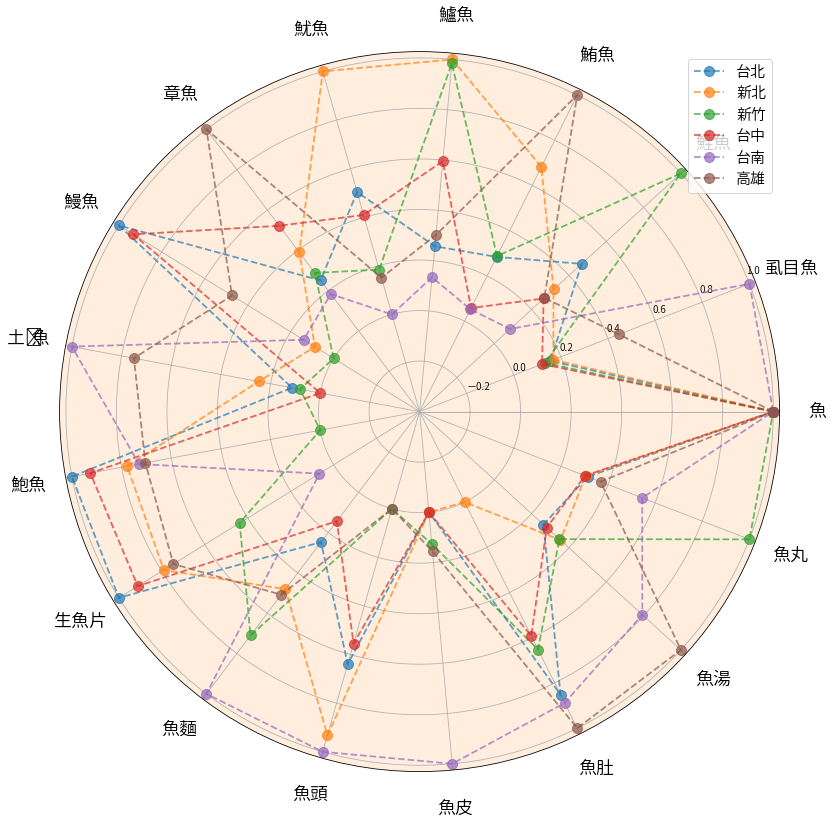

In [11]:
arr = city_count.values[0:6] 
arr = arr / arr.max(1)[:, np.newaxis] # 最大值 即 "魚"
arr = arr / arr.max(0)
arr = np.nan_to_num(arr) # 避免全0狀況

ar =  np.concatenate((arr, arr[:, 0:1]), axis=1)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0, 0, 1, 1], projection='polar', facecolor='#ffeedd')

angle = np.linspace(0, 2*np.pi, ar.shape[1])
for i in range(ar.shape[0]):
    ax.plot(angle, ar[i], 'o--', ms=10, lw=1.8, label=city_list[i], alpha=0.7)
for i in range(ar.shape[1]-1):
    ax.text(angle[i], 1.175, columns[i], fontsize=18, 
            horizontalalignment='center', verticalalignment='center')

plt.ylim([-0.4, 1.025])
plt.xticks(np.linspace(0, 2*np.pi, ar.shape[1]), [])
ax.grid(True)
plt.legend(loc=1, fontsize=15)